<a href="https://colab.research.google.com/github/tilumoni85/Car_evaluation-using-Decision-Tree/blob/main/Decision_Trees_car_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/sample_data/car_evaluation.csv')

In [6]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
col_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names :
  print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [11]:
df['class'].value_counts()

,count
class,
unacc,1209
acc,384
good,69
vgood,65


In [12]:
X = df.drop(['class'],axis =1)
y= df['class']

In [13]:
# split X and y into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state = 42)

In [14]:
X_train.shape, X_test.shape

((1208, 6), (519, 6))

In [15]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [16]:
# import category encoders

import category_encoders as ce

In [17]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [18]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,1,1,1,1,1,1
585,2,2,2,2,2,2
1551,3,1,2,1,3,2
727,2,1,3,2,1,1
707,2,1,3,3,1,3


In [19]:
# import Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier

In [20]:
# instantiate the decisiontreeclassifier model with criterion gini index

In [21]:
clf_gini = DecisionTreeClassifier(criterion = 'gini',max_depth = 3, random_state =0)

# fit the model
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [22]:
y_pred_gini = clf_gini.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
print('Model acc score with gini index : {0:0.4f}'.format (accuracy_score(y_test, y_pred_gini)))

Model acc score with gini index : 0.8150


In [24]:
# Now, check if the model  is overfitting or underfitting.

In [25]:
y_train_pred_gini = clf_gini.predict(X_train )
y_train_pred_gini

array(['acc', 'acc', 'acc', ..., 'unacc', 'unacc', 'acc'], dtype=object)

In [26]:
print('traing acc : {0:0.4f}'.format (accuracy_score(y_train,y_train_pred_gini)))

traing acc : 0.8013


In [27]:
print('Training set score :{:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Testing set score :{:.4f}'.format(clf_gini.score(X_test, y_test )))

# accuracy_score: Used as an independent function, mainly after predictions have been made.
# score: Used as a method tied to the model, often during or after training to quickly assess performance.

Training set score :0.8013
Testing set score :0.8150


In [28]:
import matplotlib.pyplot as plt

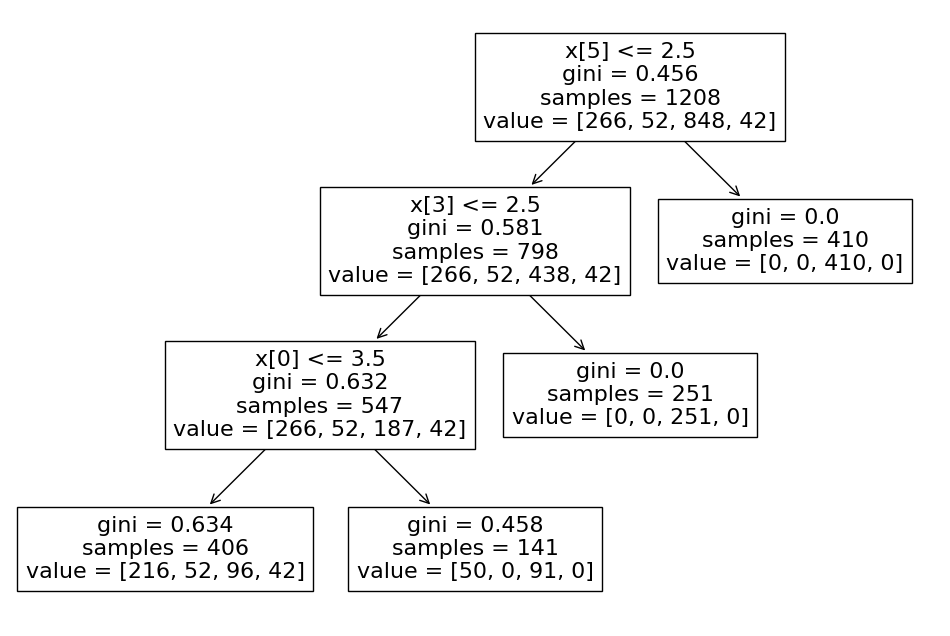

In [29]:
plt.figure(figsize = (12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train,y_train))
plt.show()

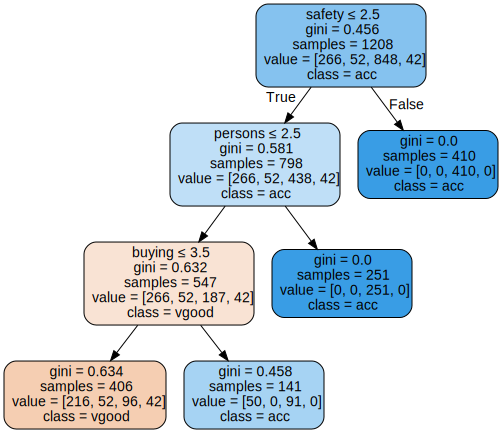

In [30]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file = None, feature_names = X_train.columns, class_names = y_train, filled = True,rounded = True, special_characters= True)
graph = graphviz.Source(dot_data)
graph

In [31]:
# Now, I wil try to use the entropy criterion

In [32]:
clf_en = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3, random_state =0)

# fit the model
clf_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [33]:
y_pred_en= clf_en.predict(X_test)

In [34]:
print('Model acc score with entropy index : {0:0.4f}'.format (accuracy_score(y_test, y_pred_en)))

Model acc score with entropy index : 0.8150


In [36]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array(['acc', 'acc', 'acc', ..., 'unacc', 'unacc', 'acc'], dtype=object)

In [37]:
print('Training acc score with entropy index :{0:0.4f}'.format(accuracy_score(y_train, y_pred_train_en)))

Training acc score with entropy index :0.8013


In [38]:
print('Training set score :{:.4f}'.format(clf_en.score(X_train, y_train)))
print('Testing set score :{:.4f}'.format(clf_en.score(X_test, y_test )))

Training set score :0.8013
Testing set score :0.8150


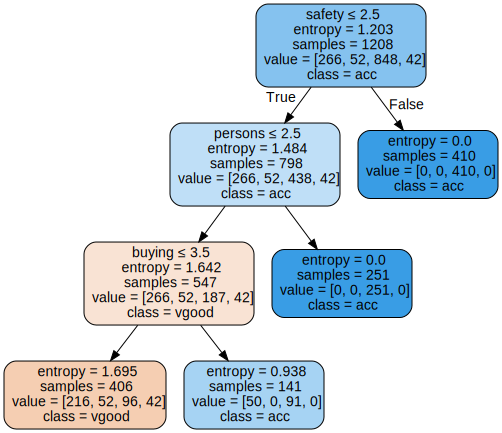

In [39]:
import graphviz

dot_data = tree.export_graphviz(clf_en, out_file = None, feature_names = X_train.columns, class_names = y_train, filled = True,rounded = True, special_characters= True)
graph = graphviz.Source(dot_data)
graph

GridSearchCV

In [40]:
# GridSearchCV is a powerful tool in scikit-learn for optimizing hyperparameters of a model. It systematically works through multiple combinations of parameter values,
# cross-validating as
# it goes to determine which combination provides the best performance.

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
clf = DecisionTreeClassifier(random_state=42)

In [43]:
# Set Up the Parameter Grid: Create a dictionary containing the parameters you want to tune and the range of values to try for each.

In [44]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion to split nodes
    'max_depth': [None, 3, 5, 10],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at each leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}


In [46]:
# Initialize GridSearchCV: Initialize GridSearchCV with your model, parameter grid, and other options like cross-validation strategy and scoring metric.

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)



In [47]:
# cv=5: This specifies 5-fold cross-validation.
# scoring='accuracy': This tells GridSearchCV to use accuracy as the evaluation metric.
# n_jobs=-1: This allows the use of all available cores to perform the grid search, speeding up the process.
# verbose=2: This gives you detailed logs of the process.

In [48]:
# Now, lets fit the grid search

In [49]:
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation accuracy: 0.95


In [50]:
# Evaluate the Best Model on the Test Set: After finding the best parameters, you can use the model to make predictions on the test set and evaluate its performance.

In [51]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(test_accuracy))


Test set accuracy: 0.94


Confusion matrix


In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [53]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
# make prediction on test set
y_pred = clf.predict(X_test)

In [54]:
# Generate the Confusion Matrix: Use the confusion_matrix function to generate the confusion matrix based on the true labels (y_test) and the predicted labels (y_pred).

In [55]:
cm = confusion_matrix(y_test, y_pred)


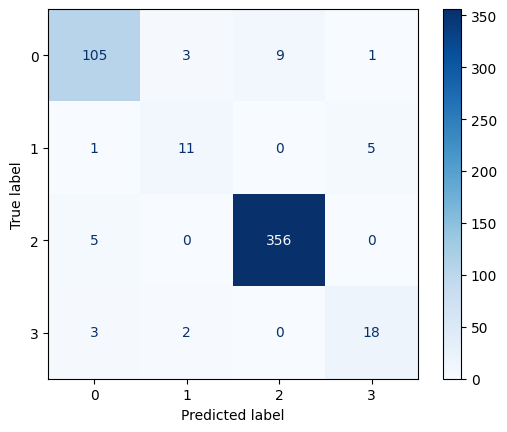

In [61]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


In [64]:

from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

         acc       0.92      0.89      0.91       118
        good       0.69      0.65      0.67        17
       unacc       0.98      0.99      0.98       361
       vgood       0.75      0.78      0.77        23

    accuracy                           0.94       519
   macro avg       0.83      0.83      0.83       519
weighted avg       0.94      0.94      0.94       519



<!-- Classification report -->

<!-- Classification report -->